# **Lab Assignment Three: Extending Logistic Regression**  
***Logan Choi, Kawther Aldosarei***  

## **1. Preparation and Overview**  
The goal of this project is to develop a **multi-class classification model** to predict **student performance** based on demographic and academic factors. The **Student Performance Dataset** contains various attributes related to students' backgrounds, study habits, and school-related factors, along with their final grades. Since predicting an exact grade is challenging, we simplify this into a three-class classification problem:  

* **Low Performance (0-9)**
* **Medium Performance (10-14)**
* **High Performance (15-20)**  

### **Business & Use-Case**  
This model can be useful for:  

1. **Educational Institutions & Teachers**  
   * Helps identify at-risk students early.  
   * Assists in providing targeted academic interventions.  
   * Improves curriculum planning and resource allocation.  

2. **Students & Parents**  
   * Helps students understand key factors influencing their academic success.  
   * Provides insights into study habits and attendance impact.  

3. **Policymakers & Educational Researchers**  
   * Supports data-driven decision-making in education policy.  
   * Helps analyze the impact of socio-economic factors on academic performance.  

### **Performance Expectations**  
* **Baseline Accuracy:** If student performance is randomly guessed, accuracy would be around **33%** (since there are three classes).  
* **Useful Performance:** Achieving **70%+ accuracy** would indicate a meaningful model for academic insights and interventions.  

---  

**Dataset:** Student Performance Dataset  

**URL:** [https://archive.ics.uci.edu/ml/datasets/Student+Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)  


In [1637]:
import pandas as pd
import numpy as np
import warnings

In [1638]:
warnings.filterwarnings("ignore")

In [1639]:
# Read in dataset
student_mat = pd.read_csv('/Users/loganchoi/Desktop/logistic-regression/data/student/student-mat.csv', sep=';')
student_por = pd.read_csv('/Users/loganchoi/Desktop/logistic-regression/data/student/student-por.csv', sep=';')

In [1640]:
# Shape of data
print(student_mat.shape)
print(student_por.shape)

(395, 33)
(649, 33)


In [1641]:
# Combine both datasets
df = pd.concat([student_mat, student_por], ignore_index=True)

In [1642]:
# Number of rows and columns
df.shape

(1044, 33)

In [1643]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Combine both dataests

6497 rows

In [1644]:
# Check for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


No missing values

In [1645]:
# Check for missing rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


No duplicated rows

In [1646]:
# Describe summary
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Data summary

In [1647]:
# Initialize an empty DataFrame
data_des = pd.DataFrame()

# Add feature names
data_des['Features'] = [
    "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", 
    "guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", 
    "nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
    "absences", "G1", "G2", "G3"
]

# Add descriptions for each feature
data_des['Description'] = [
    "Student's school (e.g., 'GP' or 'MS')",
    "Student's sex (Male/Female)",
    "Student's age (in years)",
    "Student's address (Urban/Rural)",
    "Student's family size (Small/Large)",
    "Parental cohabitation status (T = Together, A = Apart)",
    "Mother's education level (0 - 4)",
    "Father's education level (0 - 4)",
    "Mother's job (e.g., 'teacher', 'health', etc.)",
    "Father's job (e.g., 'teacher', 'health', etc.)",
    "Reason to choose the school (e.g., 'course', 'home', etc.)",
    "Student's guardian (e.g., 'mother', 'father', 'other')",
    "Time travel to school (1 = <15 min, 4 = >60 min)",
    "Weekly study time (1 - 4)",
    "Number of past failures (0 - 3)",
    "Extra educational support (Yes/No)",
    "Family educational support (Yes/No)",
    "Extra paid classes (Yes/No)",
    "Student's extracurricular activities (Yes/No)",
    "Attended nursery school (Yes/No)",
    "Student's desire for higher education (Yes/No)",
    "Access to the internet (Yes/No)",
    "Romantic relationship (Yes/No)",
    "Family relationship quality (1-5)",
    "Leisure time (1-5)",
    "Socializing (1-5)",
    "Workday alcohol consumption (1-5)",
    "Weekend alcohol consumption (1-5)",
    "Health status (1-5)",
    "Absences (number of school absences)",
    "First period grade (G1)",
    "Second period grade (G2)",
    "Final grade (G3 - target variable)"
]

# Add scales for each feature
data_des['Scales'] = [
    "Nominal",    # school
    "Nominal",    # sex
    "Ratio",      # age
    "Nominal",    # address
    "Nominal",    # famsize
    "Nominal",    # Pstatus
    "Ordinal",    # Medu
    "Ordinal",    # Fedu
    "Nominal",    # Mjob
    "Nominal",    # Fjob
    "Nominal",    # reason
    "Nominal",    # guardian
    "Ordinal",    # traveltime
    "Ordinal",    # studytime
    "Ordinal",    # failures
    "Nominal",    # schoolsup
    "Nominal",    # famsup
    "Nominal",    # paid
    "Nominal",    # activities
    "Nominal",    # nursery
    "Nominal",    # higher
    "Nominal",    # internet
    "Nominal",    # romantic
    "Ordinal",    # famrel
    "Ordinal",    # freetime
    "Ordinal",    # goout
    "Ordinal",    # Dalc
    "Ordinal",    # Walc
    "Ordinal",    # health
    "Ratio",      # absences
    "Ratio",      # G1
    "Ratio",      # G2
    "Ordinal",    # G3 (target variable)
]

# Add Discrete/Continuous classification
data_des['Type'] = [
    "Categorical",  # school
    "Categorical",  # sex
    "Continuous",   # age
    "Categorical",  # address
    "Categorical",  # famsize
    "Categorical",  # Pstatus
    "Discrete",     # Medu
    "Discrete",     # Fedu
    "Categorical",  # Mjob
    "Categorical",  # Fjob
    "Categorical",  # reason
    "Categorical",  # guardian
    "Discrete",     # traveltime
    "Discrete",     # studytime
    "Discrete",     # failures
    "Categorical",  # schoolsup
    "Categorical",  # famsup
    "Categorical",  # paid
    "Categorical",  # activities
    "Categorical",  # nursery
    "Categorical",  # higher
    "Categorical",  # internet
    "Categorical",  # romantic
    "Discrete",     # famrel
    "Discrete",     # freetime
    "Discrete",     # goout
    "Discrete",     # Dalc
    "Discrete",     # Walc
    "Discrete",     # health
    "Continuous",   # absences
    "Continuous",   # G1
    "Continuous",   # G2
    "Ordinal",      # G3
]

# Add range for each feature
data_des['Range'] = [
    "GP / MS",             # school
    "Male / Female",       # sex
    "15 - 22",             # age
    "Urban / Rural",       # address
    "Small / Large",       # famsize
    "T / A",               # Pstatus
    "0 - 4",               # Medu
    "0 - 4",               # Fedu
    "teacher / health / other",  # Mjob
    "teacher / health / other",  # Fjob
    "course / home / other",  # reason
    "mother / father / other",  # guardian
    "1 - 4",               # traveltime
    "1 - 4",               # studytime
    "0 - 3",               # failures
    "Yes / No",            # schoolsup
    "Yes / No",            # famsup
    "Yes / No",            # paid
    "Yes / No",            # activities
    "Yes / No",            # nursery
    "Yes / No",            # higher
    "Yes / No",            # internet
    "Yes / No",            # romantic
    "1 - 5",               # famrel
    "1 - 5",               # freetime
    "1 - 5",               # goout
    "1 - 5",               # Dalc
    "1 - 5",               # Walc
    "1 - 5",               # health
    "0 - 93",              # absences
    "0 - 20",              # G1
    "0 - 20",              # G2
    "0 - 20",              # G3 (target variable)
]

# Display the DataFrame
data_des


,Features,Description,Scales,Type,Range
0,school,"Student's school (e.g., 'GP' or 'MS')",Nominal,Categorical,GP / MS
1,sex,Student's sex (Male/Female),Nominal,Categorical,Male / Female
2,age,Student's age (in years),Ratio,Continuous,15 - 22
3,address,Student's address (Urban/Rural),Nominal,Categorical,Urban / Rural
4,famsize,Student's family size (Small/Large),Nominal,Categorical,Small / Large
5,Pstatus,"Parental cohabitation status (T = Together, A ...",Nominal,Categorical,T / A
6,Medu,Mother's education level (0 - 4),Ordinal,Discrete,0 - 4
7,Fedu,Father's education level (0 - 4),Ordinal,Discrete,0 - 4
8,Mjob,"Mother's job (e.g., 'teacher', 'health', etc.)",Nominal,Categorical,teacher / health / other
9,Fjob,"Father's job (e.g., 'teacher', 'health', etc.)",Nominal,Categorical,teacher / health / other


Description of data

Need to convert categorical data into numerical data using one-hot encoding

In [1648]:
# Visualizetion
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

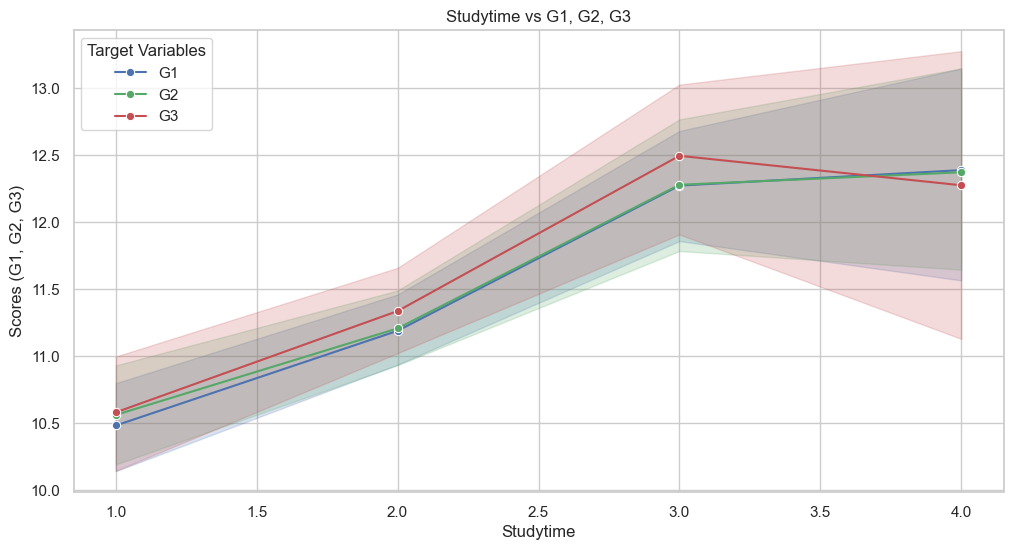

In [1649]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Studytime vs G1, G2, and G3 in the same graph
sns.lineplot(x='studytime', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='studytime', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='studytime', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Studytime vs G1, G2, G3')
plt.xlabel('Studytime')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()

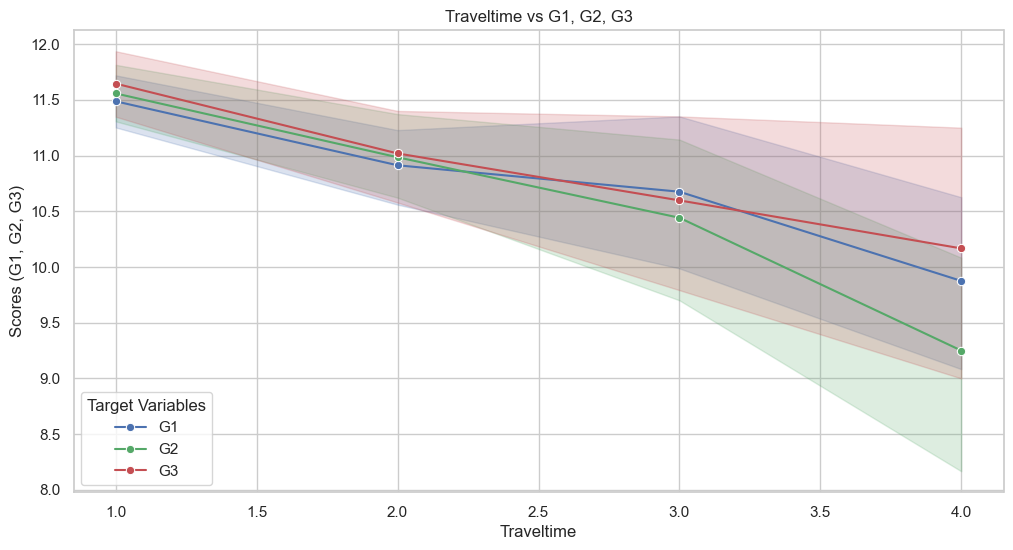

In [1650]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Traveltime vs G1, G2, and G3 in the same graph
sns.lineplot(x='traveltime', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='traveltime', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='traveltime', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Traveltime vs G1, G2, G3')
plt.xlabel('Traveltime')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()


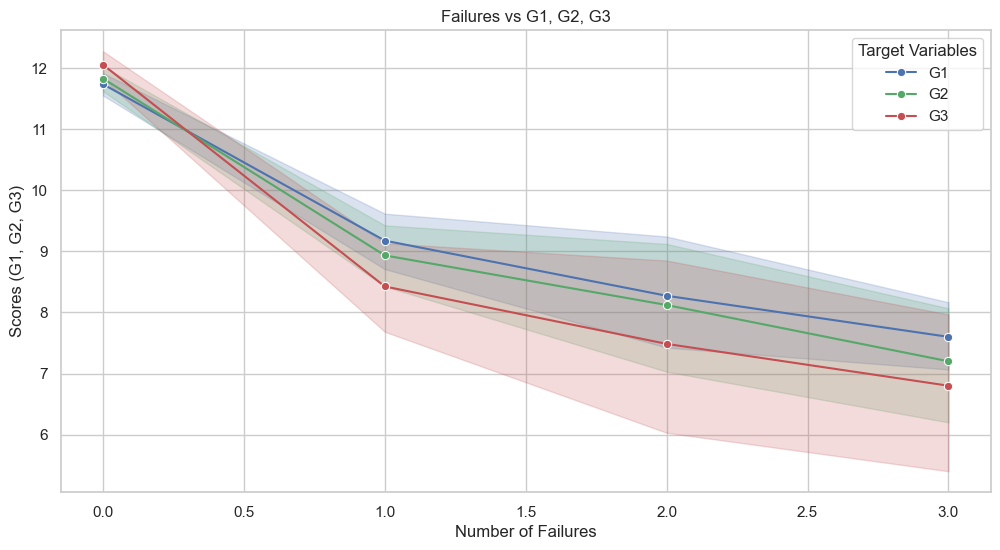

In [1651]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Failures vs G1, G2, G3 in the same graph
sns.lineplot(x='failures', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='failures', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='failures', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Failures vs G1, G2, G3')
plt.xlabel('Number of Failures')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()

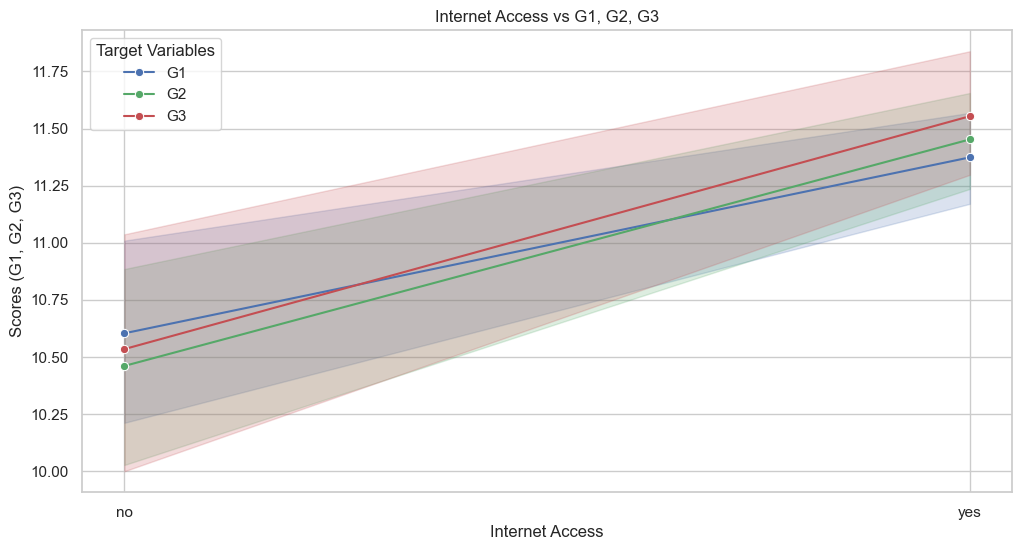

In [1652]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the correlation between internet access and G1, G2, and G3
sns.lineplot(x='internet', y='G1', data=df, marker='o', label='G1', color='b')
sns.lineplot(x='internet', y='G2', data=df, marker='o', label='G2', color='g')
sns.lineplot(x='internet', y='G3', data=df, marker='o', label='G3', color='r')

# Customize the plot
plt.title('Internet Access vs G1, G2, G3')
plt.xlabel('Internet Access')
plt.ylabel('Scores (G1, G2, G3)')
plt.grid(True)

# Add a legend
plt.legend(title='Target Variables')

# Show the plot
plt.show()


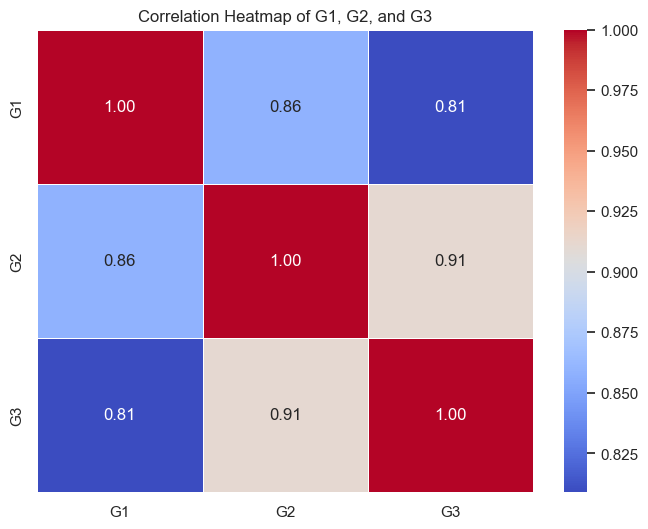

In [1653]:
# Calculate the correlation matrix for G1, G2, G3
corr_matrix = df[['G1', 'G2', 'G3']].corr()

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of G1, G2, and G3')

# Show the plot
plt.show()

In [1654]:
# Create a new feature 'average_G' that is the average of G1, G2, and G3
df['average_G'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Show the first few rows of the updated dataframe to check the new feature
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [1655]:
# Split data
from sklearn.model_selection import train_test_split

In [1656]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [1657]:
# Convert target to categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [1658]:
# Bin the 'average_G' target into three categories: Low, Medium, High
bins = [0, 10, 15, 20]  # Adjust the bin edges to match the range of 'average_G'
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(df['average_G'], bins=bins, labels=labels, right=False)

# Features (X) and target (y_binned)
X = df.drop(columns=["average_G"])
y = y_binned

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1659]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Standardize numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessing and Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=10000))  # Logistic regression classifier
])

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of accuracy: {cv_scores.std():.4f}")

Cross-validation accuracy scores: [0.94610778 0.95808383 0.95808383 0.96407186 0.93413174]
Mean accuracy: 0.9521
Standard Deviation of accuracy: 0.0107


## Modeling

In [1660]:
from sklearn.metrics import accuracy_score, classification_report
from scipy.special import expit

In [1661]:
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [1662]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'


    @property
    def coef_(self):
        if(hasattr(self,'w_')):
            return self.w_[1:]
        else:
            return None

    @property
    def intercept_(self):
        if(hasattr(self,'w_')):
            return self.w_[0]
        else:
            return None

        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


In [1663]:
class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

In [1664]:
class LogisticRegression:
    def __init__(self, eta=0.01, iterations=20, solver='sgd', C=1.0, penalty=None):
        """
        Parameters:
        - eta: Learning rate
        - iterations: Number of iterations
        - solver: Optimization method ('sgd', 'steepest', or 'newton')
        - C: Regularization strength
        - penalty: Type of regularization ('l1', 'l2', 'elasticnet', or None)
        """
        self.eta = eta
        self.iters = iterations
        self.solver = solver
        self.C = C
        self.penalty = penalty  # None, 'l1', 'l2', or 'elasticnet'

    def __str__(self):
        return 'Logistic Regression' if not hasattr(self, 'w_') else f'Logistic Regression with coefficients:\n{self.w_}'

    @property
    def coef_(self):
        return self.w_[:, 1:] if hasattr(self, 'w_') else None

    @property
    def intercept_(self):
        return self.w_[:, 0] if hasattr(self, 'w_') else None

    def _compute_gradient(self, X, y, w):
        """
        Compute gradient with regularization.
        """
        m = len(y)
        h = expit(X @ w)
        gradient = (1 / m) * X.T @ (h - y)

        if self.penalty == 'l2':  # Ridge
            gradient[1:] += (self.C / m) * w[1:]
        elif self.penalty == 'l1':  # Lasso
            gradient[1:] += (self.C / m) * np.sign(w[1:])
        elif self.penalty == 'elasticnet':  # L1 + L2
            gradient[1:] += (self.C / m) * (w[1:] + np.sign(w[1:]))

        return gradient

    def fit(self, X, y):
        """
        Train a one-vs-all logistic regression model.
        """
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y)
        num_classes = len(self.unique_)
        self.classifiers_ = []
        self.w_ = np.zeros((num_classes, num_features + 1))

        X_bias = np.c_[np.ones((num_samples, 1)), X]  # Add bias term

        for i, yval in enumerate(self.unique_):
            y_binary = (y == yval).astype(int)
            w = np.zeros(num_features + 1)

            if self.solver == 'sgd':
                for _ in range(self.iters):
                    for j in range(num_samples):
                        xi = X_bias[j:j + 1]
                        yi = y_binary[j:j + 1]
                        gradient = self._compute_gradient(xi, yi, w)
                        w -= self.eta * gradient

            elif self.solver == 'steepest':
                for _ in range(self.iters):
                    gradient = self._compute_gradient(X_bias, y_binary, w)
                    w -= self.eta * gradient

            elif self.solver == 'newton':
                for _ in range(self.iters):
                    h = expit(X_bias @ w)
                    R = np.diag(h * (1 - h))
                    H = (X_bias.T @ R @ X_bias) / num_samples  # Hessian
                    gradient = self._compute_gradient(X_bias, y_binary, w)
                    w -= np.linalg.pinv(H) @ gradient  # Newton update

            else:
                raise ValueError("Unsupported solver. Choose 'sgd', 'steepest', or 'newton'.")

            self.classifiers_.append(w)
            self.w_[i] = w

    def predict_proba(self, X):
        """
        Compute class probabilities.
        """
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        return expit(X_bias @ self.w_.T)

    def predict(self, X):
        """
        Predict the class with the highest probability.
        """
        return self.unique_[np.argmax(self.predict_proba(X), axis=1)]

In [1675]:
# Categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)

lr = LogisticRegression(eta=0.1, iterations=10, solver='newton', C=10, penalty='l2')

# lr = LogisticRegression(eta=0.1, iterations=500)
lr.fit(X_train_scaled, y_train)

accuracy = np.mean(lr.predict(X_test_scaled) == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.3254


In [1689]:
# Record time data
import time

In [1687]:
# Define parameters to tune
solvers = ['sgd', 'steepest', 'newton']
C_values = [0.01, 0.1, 1.0, 10]
penalties = [None, 'l1', 'l2', 'elasticnet']

# Store the results
results = {solver: {} for solver in solvers}

# Iterate through each combination of solver, C value, and penalty
for solver in solvers:
    for C in C_values:
        for penalty in penalties:
            try:
                model = LogisticRegression(eta=0.1, iterations=500, solver=solver, C=C, penalty=penalty)

                # Measure training time
                start_time = time.time()
                model.fit(X_train_scaled, y_train)
                train_time = time.time() - start_time

                # Evaluate accuracy on test set
                y_pred = model.predict(X_test_scaled)
                accuracy = accuracy_score(y_test, y_pred)

                # Store the results
                results[solver][(C, penalty)] = (accuracy, train_time)
                print(f"Solver: {solver}, C: {C}, Penalty: {penalty} - Accuracy: {accuracy:.4f}, Training Time: {train_time:.4f}s")
            except Exception as e:
                print(f"Solver: {solver}, C: {C}, Penalty: {penalty} - ERROR: {e}")

Solver: sgd, C: 0.01, Penalty: None - Accuracy: 0.9617, Training Time: 4.0103s
Solver: sgd, C: 0.01, Penalty: l1 - Accuracy: 0.8182, Training Time: 5.3857s
Solver: sgd, C: 0.01, Penalty: l2 - Accuracy: 0.7895, Training Time: 4.9341s
Solver: sgd, C: 0.01, Penalty: elasticnet - Accuracy: 0.7703, Training Time: 5.9060s
Solver: sgd, C: 0.1, Penalty: None - Accuracy: 0.9617, Training Time: 3.9886s
Solver: sgd, C: 0.1, Penalty: l1 - Accuracy: 0.7273, Training Time: 5.5729s
Solver: sgd, C: 0.1, Penalty: l2 - Accuracy: 0.6842, Training Time: 5.0976s
Solver: sgd, C: 0.1, Penalty: elasticnet - Accuracy: 0.6986, Training Time: 6.1325s
Solver: sgd, C: 1.0, Penalty: None - Accuracy: 0.9617, Training Time: 4.1611s
Solver: sgd, C: 1.0, Penalty: l1 - Accuracy: 0.6077, Training Time: 5.7679s
Solver: sgd, C: 1.0, Penalty: l2 - Accuracy: 0.6411, Training Time: 5.0890s
Solver: sgd, C: 1.0, Penalty: elasticnet - Accuracy: 0.5167, Training Time: 6.0934s
Solver: sgd, C: 10, Penalty: None - Accuracy: 0.9617, 

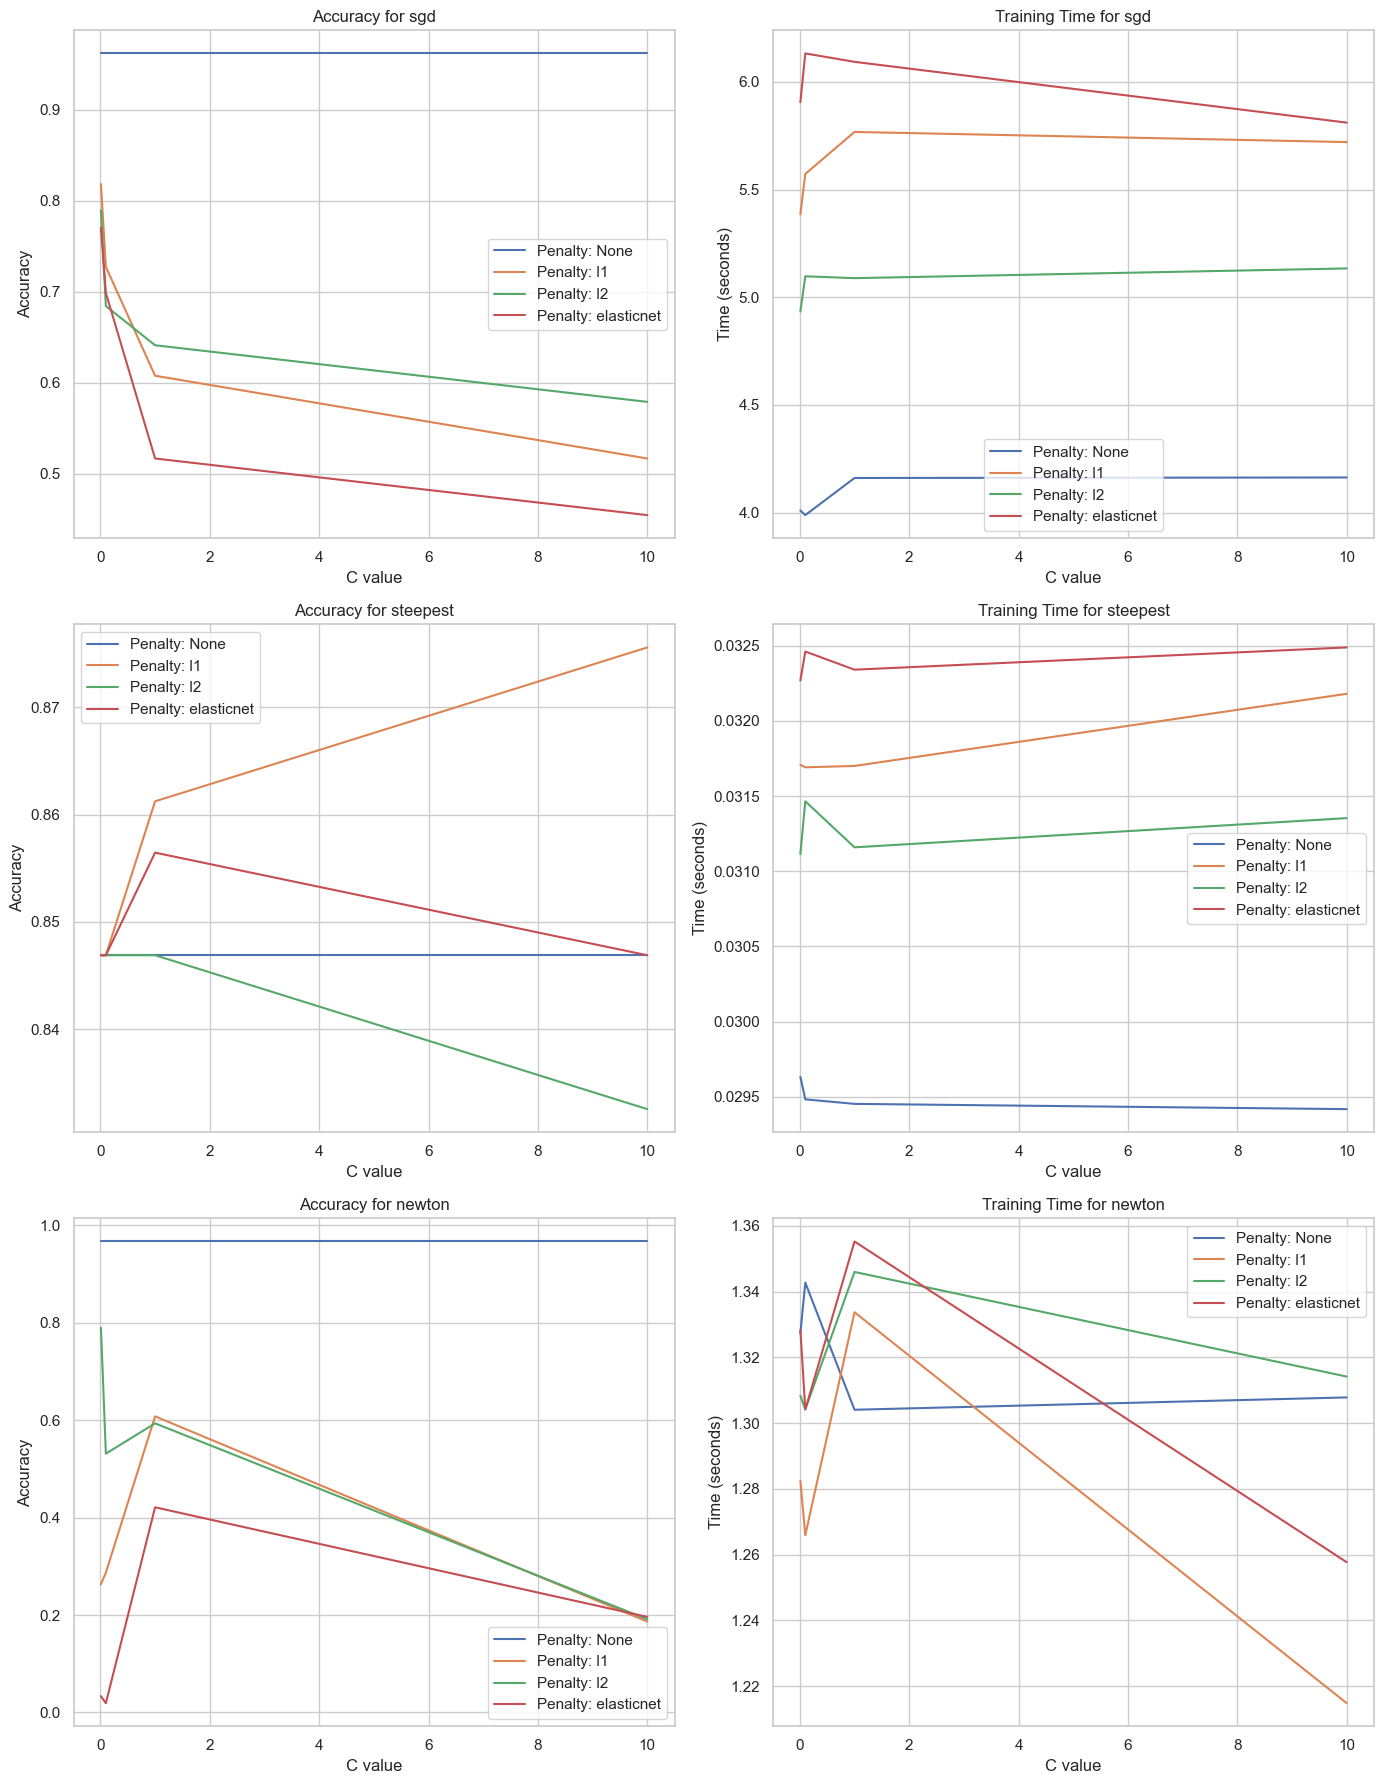

In [1688]:
# Create plots for accuracy and training time comparison, grouped by solver
fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # Three solvers, two plots per solver (accuracy, time)
axes = axes.flatten()

# Plot results for each solver
for idx, solver in enumerate(solvers):
    # Accuracy Plot for current solver
    axes[2*idx].set_title(f"Accuracy for {solver}")
    axes[2*idx].set_xlabel("C value")
    axes[2*idx].set_ylabel("Accuracy")
    for penalty in penalties:
        accuracies = [results[solver].get((C, penalty), (0, 0))[0] for C in C_values]
        axes[2*idx].plot(C_values, accuracies, label=f"Penalty: {penalty}")

    axes[2*idx].legend()

    # Training Time Plot for current solver
    axes[2*idx + 1].set_title(f"Training Time for {solver}")
    axes[2*idx + 1].set_xlabel("C value")
    axes[2*idx + 1].set_ylabel("Time (seconds)")
    for penalty in penalties:
        times = [results[solver].get((C, penalty), (0, 0))[1] for C in C_values]
        axes[2*idx + 1].plot(C_values, times, label=f"Penalty: {penalty}")

    axes[2*idx + 1].legend()

plt.tight_layout()
plt.show()

# **Key Observations from Results**

## **1. Accuracy**
- **Best Accuracy**: The best accuracy is achieved with the `newton` solver and a regularization penalty of `None`, which consistently returns 96.65% across all `C` values (0.01, 0.1, 1.0, and 10).
- **Worst Accuracy**: The `newton` solver with `elasticnet` penalty shows the worst performance, with accuracy dropping drastically to around 3-19% across all `C` values.

### **Impact of Penalties:**
- **None**: Generally leads to high accuracy, especially with `newton`.
- **l1**: This penalty results in much lower accuracy, especially with `sgd` and `newton`.
- **l2**: Also reduces accuracy compared to `None`, but the effect is less severe.
- **elasticnet**: This combination leads to significantly lower accuracies in most cases.

## **2. Training Time**
- **Fastest Solver**: The `steepest` solver consistently provides the fastest training times, with values hovering around 0.03-0.05 seconds, regardless of the `C` value or penalty. This is much faster compared to `sgd` and `newton`.
- **Slowest Solver**: The `newton` solver has the longest training time, typically ranging from 1.3 to 1.4 seconds, but it delivers the highest accuracy.

### **Effect of `C` and Penalty on Training Time:**
- Increasing `C` does not significantly affect training time for `steepest` or `sgd`.
- For `newton`, training time slightly increases with larger values of `C`.
- Regularization penalties (especially `elasticnet`) tend to increase training time, but not drastically for `steepest`.

## **3. Performance Summary by Solver**

- **SGD Solver**:
  - Accuracy is good for `None` and declines significantly with any penalty.
  - Training times are moderate, but they remain consistent regardless of penalty or `C` value.

- **Steepest Solver**:
  - Very fast training times.
  - Accuracy remains stable around 0.85 for most configurations, with slight improvement when using `l1`.
  - Penalty choice does not have a major impact on accuracy.

- **Newton Solver**:
  - Highest accuracy when no penalty is applied (`None`), but accuracy significantly drops with any penalty.
  - Longest training times compared to the other solvers.

# **Key Takeaways**
- Accuracy is best with the `newton` solver and no regularization (`None`), but it suffers when regularization is introduced, especially `elasticnet`.
- Training time is lowest with the `steepest` solver, though it sacrifices some accuracy in comparison to `newton`.
- Regularization penalties (especially `l1` and `elasticnet`) negatively affect accuracy for both `sgd` and `newton` solvers, with `elasticnet` performing the worst across all configurations.

# **Recommendation**
- If accuracy is the top priority for your model, consider using the `newton` solver with no penalty (`None`), as it provides the highest accuracy.
- If training time is crucial, opt for the `steepest` solver. It is much faster, albeit with a slight trade-off in accuracy.
